In [2]:
import pandas as pd

In [49]:
# 1. Load dataset
df = pd.read_csv('Mental_Health_Lifestyle_Dataset.csv')

In [50]:
# 2. Replace NaN di kolom target
df['Mental Health Condition'] = df['Mental Health Condition'].fillna('Normal')

# 3. Cek kembali
print(df['Mental Health Condition'].value_counts(dropna=False))

Mental Health Condition
Anxiety       628
PTSD          624
Normal        595
Depression    580
Bipolar       573
Name: count, dtype: int64


In [37]:
print("=== INFO DATAFRAME ===")
df.info()

=== INFO DATAFRAME ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Country                      3000 non-null   object 
 1   Age                          3000 non-null   int64  
 2   Gender                       3000 non-null   object 
 3   Exercise Level               3000 non-null   object 
 4   Diet Type                    3000 non-null   object 
 5   Sleep Hours                  3000 non-null   float64
 6   Stress Level                 3000 non-null   object 
 7   Mental Health Condition      3000 non-null   object 
 8   Work Hours per Week          3000 non-null   int64  
 9   Screen Time per Day (Hours)  3000 non-null   float64
 10  Social Interaction Score     3000 non-null   float64
 11  Happiness Score              3000 non-null   float64
dtypes: float64(4), int64(2), object(6)
memory usage: 281.

In [38]:
print("\n=== DESKRIPSI STATISTIK NUMERIK ===")
print(df.describe())


=== DESKRIPSI STATISTIK NUMERIK ===
               Age  Sleep Hours  Work Hours per Week  \
count  3000.000000  3000.000000          3000.000000   
mean     41.229667     6.475933            39.466333   
std      13.428416     1.499866            11.451459   
min      18.000000     1.400000            20.000000   
25%      30.000000     5.500000            30.000000   
50%      41.000000     6.500000            39.000000   
75%      53.000000     7.500000            50.000000   
max      64.000000    11.300000            59.000000   

       Screen Time per Day (Hours)  Social Interaction Score  Happiness Score  
count                  3000.000000               3000.000000      3000.000000  
mean                      5.089833                  5.470200         5.395067  
std                       1.747231                  2.563532         2.557601  
min                       2.000000                  1.000000         1.000000  
25%                       3.600000                  3.3000

In [39]:
df

,Country,Age,Gender,Exercise Level,Diet Type,Sleep Hours,Stress Level,Mental Health Condition,Work Hours per Week,Screen Time per Day (Hours),Social Interaction Score,Happiness Score
0,Brazil,48,Male,Low,Vegetarian,6.3,Low,Normal,21,4.0,7.8,6.5
1,Australia,31,Male,Moderate,Vegan,4.9,Low,PTSD,48,5.2,8.2,6.8
2,Japan,37,Female,Low,Vegetarian,7.2,High,Normal,43,4.7,9.6,9.7
3,Brazil,35,Male,Low,Vegan,7.2,Low,Depression,43,2.2,8.2,6.6
4,Germany,46,Male,Low,Balanced,7.3,Low,Anxiety,35,3.6,4.7,4.4
...,...,...,...,...,...,...,...,...,...,...,...,...
2995,Japan,57,Female,Moderate,Balanced,7.0,High,Depression,29,4.4,9.7,5.9
2996,Australia,27,Male,Low,Junk Food,7.1,Low,Normal,47,7.4,6.3,9.9
2997,Australia,42,Male,Moderate,Balanced,6.0,High,Depression,23,3.9,5.2,4.1
2998,Australia,25,Male,High,Keto,5.7,Low,Anxiety,51,4.3,5.9,4.1


In [40]:
# 3. Distribusi nilai kolom target
print("\n=== VALUE COUNTS: Mental Health Condition ===")
print(df['Mental Health Condition'].value_counts(dropna=False))


=== VALUE COUNTS: Mental Health Condition ===
Mental Health Condition
Anxiety       628
PTSD          624
Normal        595
Depression    580
Bipolar       573
Name: count, dtype: int64


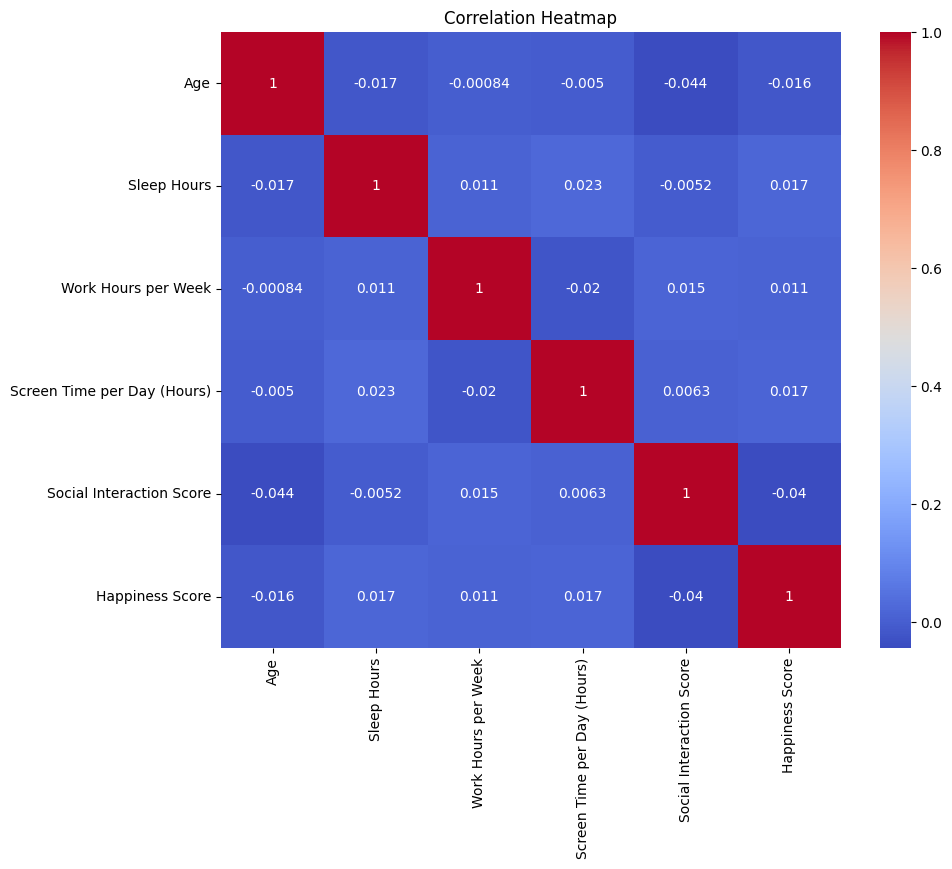

In [41]:
import matplotlib.pyplot as plt
import numpy as np
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Pilih hanya kolom numerik
numeric_df = df.select_dtypes(include=[np.number])

# Hitung matriks korelasi
corr = numeric_df.corr()

# Plot heatmap korelasi
# Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [21]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# 1. Load dataset

# 2. Ordinal mapping untuk kolom kategorikal
ord_map = {'Low': 1, 'Moderate': 2, 'High': 3}
df['Exercise Level'] = df['Exercise Level'].map(ord_map)
df['Stress Level'] = df['Stress Level'].map(ord_map)

# 3. Siapkan fitur ordinal dan numerik
features = [
    'Age',
    'Exercise Level',
    'Sleep Hours',
    'Stress Level',
    'Work Hours per Week',
    'Screen Time per Day (Hours)',
    'Social Interaction Score'
]
X = df[features]

# 4. Encode target
le = LabelEncoder()
y = le.fit_transform(df['Mental Health Condition'])

# 5. Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 6. Train RandomForestClassifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# 7. Hitung dan tampilkan feature importances
importances = pd.Series(rf.feature_importances_, index=X.columns) \
                 .sort_values(ascending=False)

print("Feature importances (ordinal encoding):")
print(importances)


Feature importances (ordinal encoding):
Social Interaction Score       0.186205
Sleep Hours                    0.183209
Screen Time per Day (Hours)    0.181707
Age                            0.174259
Work Hours per Week            0.167707
Stress Level                   0.055227
Exercise Level                 0.051686
dtype: float64


In [42]:
# 1. Hitung berapa banyak unique values per kolom
print("=== Unique counts per column ===")
print(df.nunique())

# 2. Tampilkan daftar unique values tiap kolom (hati-hati kalau ada ribuan!)
for col in df.columns:
    uniques = df[col].unique()
    print(f"\n--- {col} ({len(uniques)} unique) ---")
    print(uniques)


=== Unique counts per column ===
Country                         7
Age                            47
Gender                          3
Exercise Level                  3
Diet Type                       5
Sleep Hours                    93
Stress Level                    3
Mental Health Condition         5
Work Hours per Week            40
Screen Time per Day (Hours)    61
Social Interaction Score       91
Happiness Score                91
dtype: int64

--- Country (7 unique) ---
['Brazil' 'Australia' 'Japan' 'Germany' 'India' 'Canada' 'USA']

--- Age (47 unique) ---
[48 31 37 35 46 23 49 60 19 40 36 22 51 27 42 28 32 26 52 38 45 63 24 33
 50 21 56 57 34 54 53 55 44 39 18 30 43 62 58 59 25 41 61 47 64 20 29]

--- Gender (3 unique) ---
['Male' 'Female' 'Other']

--- Exercise Level (3 unique) ---
['Low' 'Moderate' 'High']

--- Diet Type (5 unique) ---
['Vegetarian' 'Vegan' 'Balanced' 'Junk Food' 'Keto']

--- Sleep Hours (93 unique) ---
[ 6.3  4.9  7.2  7.3  2.7  6.6  4.7  3.3  8.1  2.6  5.3

In [43]:
# 2. Tampilkan unique values di kolom Diet Type
unique_diets = df['Diet Type'].unique()
print("Diet Type unik (jumlah:", len(unique_diets), "):")
print(unique_diets)

Diet Type unik (jumlah: 5 ):
['Vegetarian' 'Vegan' 'Balanced' 'Junk Food' 'Keto']


In [28]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# 1. Load dat

# 2. Ordinal mapping untuk Exercise & Stress
ord_map = {'Low': 1, 'Moderate': 2, 'High': 3}
df['Exercise Level'] = df['Exercise Level'].map(ord_map)
df['Stress Level']   = df['Stress Level'].map(ord_map)

# 3. One-hot encode Gender & Diet Type
df = pd.get_dummies(df, columns=['Gender'], drop_first=True)

# 4. Siapkan fitur
features = [
    'Age',
    'Exercise Level',
    'Sleep Hours',
    'Stress Level',
    'Work Hours per Week',
    'Screen Time per Day (Hours)',
    'Social Interaction Score'
]
# tambahkan kolom hasil one-hot
features += [col for col in df.columns if col.startswith('Gender_') or col.startswith('Diet Type_')]

X = df[features]

# 5. Encode target
le = LabelEncoder()
y = le.fit_transform(df['Mental Health Condition'])

# 6. Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 7. Train RandomForest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# 8. Feature importances
importances = pd.Series(rf.feature_importances_, index=X.columns) \
                .sort_values(ascending=False)

print("Feature importances (inkl. Gender & Diet Type):")
print(importances)


Feature importances (inkl. Gender & Diet Type):
Social Interaction Score       0.177016
Sleep Hours                    0.170200
Screen Time per Day (Hours)    0.169906
Age                            0.161422
Work Hours per Week            0.158288
Stress Level                   0.053346
Exercise Level                 0.050587
Gender_Other                   0.029867
Gender_Male                    0.029368
dtype: float64


In [51]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score, StratifiedKFold

# 1. Load & preprocess (ordinal mapping)
ord_map = {'Low':1,'Moderate':2,'High':3}
df['Exercise Level'] = df['Exercise Level'].map(ord_map)
df['Stress Level']   = df['Stress Level'].map(ord_map)

# 2. One-hot encode Gender (jika dipakai)
df = pd.get_dummies(df, columns=['Gender'], drop_first=True)

# 3. Siapkan X_all (dengan gender) & X_nogender
features_base = [
    'Age','Exercise Level','Sleep Hours','Stress Level',
    'Work Hours per Week','Screen Time per Day (Hours)',
    'Social Interaction Score'
]
gender_cols = [c for c in df.columns if c.startswith('Gender_')]

X_all      = df[features_base + gender_cols]
X_nogender = df[features_base]

# 4. Target encoding
y = LabelEncoder().fit_transform(df['Mental Health Condition'])

# 5. Cross-val evaluation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
clf = RandomForestClassifier(random_state=42)

scores_all      = cross_val_score(clf, X_all,      y, cv=cv, scoring='accuracy')
scores_nogender = cross_val_score(clf, X_nogender, y, cv=cv, scoring='accuracy')

print("Accuracy with gender:     ", scores_all.mean().round(4),
      "±", scores_all.std().round(4))
print("Accuracy without gender:  ", scores_nogender.mean().round(4),
      "±", scores_nogender.std().round(4))


Accuracy with gender:      0.2093 ± 0.0084
Accuracy without gender:   0.2077 ± 0.0156


In [52]:
X = df[features]
y = df['Mental Health Condition']

print("\nFeatures shape:", X.shape)
print("Target distribution:\n", y.value_counts())


Features shape: (3000, 9)
Target distribution:
 Mental Health Condition
Anxiety       628
PTSD          624
Normal        595
Depression    580
Bipolar       573
Name: count, dtype: int64


In [53]:
# ─── 4. ENCODE TARGET & SPLIT ──────────────────────────────────────────
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

le = LabelEncoder()
y_enc = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(
    X, y_enc,
    test_size=0.2,
    random_state=42,
    stratify=y_enc
)
print("\nTrain/Test sizes:", X_train.shape[0], "/", X_test.shape[0])


Train/Test sizes: 2400 / 600


In [54]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# Pilih model: uncomment salah satu
model = RandomForestClassifier(random_state=42)
# model = GradientBoostingClassifier(random_state=42)

model.fit(X_train, y_train)
print("\nModel trained:", model.__class__.__name__)


Model trained: RandomForestClassifier


In [55]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model.predict(X_test)
print("\n=== Classification Report ===")
print(classification_report(y_test, y_pred, target_names=le.classes_))

print("\n=== Confusion Matrix ===")
print(confusion_matrix(y_test, y_pred))


=== Classification Report ===
              precision    recall  f1-score   support

     Anxiety       0.18      0.24      0.21       126
     Bipolar       0.17      0.19      0.18       114
  Depression       0.23      0.16      0.19       116
      Normal       0.19      0.15      0.17       119
        PTSD       0.25      0.26      0.26       125

    accuracy                           0.20       600
   macro avg       0.21      0.20      0.20       600
weighted avg       0.21      0.20      0.20       600


=== Confusion Matrix ===
[[30 35 13 18 30]
 [38 22 19 12 23]
 [35 19 19 22 21]
 [34 27 16 18 24]
 [29 23 16 24 33]]


In [56]:
import pandas as pd

importances = pd.Series(model.feature_importances_, index=features)\
                .sort_values(ascending=False)
print("\n=== Feature Importances ===")
print(importances)


=== Feature Importances ===
Social Interaction Score       0.175789
Sleep Hours                    0.170215
Screen Time per Day (Hours)    0.165131
Age                            0.164404
Work Hours per Week            0.155817
Exercise Level                 0.055506
Stress Level                   0.055326
Gender_Other                   0.028971
Gender_Male                    0.028841
dtype: float64


In [57]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# 1. Load & preprocess seperti biasa
df = pd.read_csv('Mental_Health_Lifestyle_Dataset.csv')
# replace NaN target dengan 'None'
df['Mental Health Condition'] = df['Mental Health Condition'].fillna('None')
# ordinal mapping
ord_map = {'Low':1,'Moderate':2,'High':3}
df['Exercise Level'] = df['Exercise Level'].map(ord_map)
df['Stress Level']   = df['Stress Level'].map(ord_map)
# one-hot encode Gender
df = pd.get_dummies(df, columns=['Gender'], drop_first=True)

# 2. Siapkan X dan y
base_feats = [
    'Age',
    'Exercise Level',
    'Sleep Hours',
    'Stress Level',
    'Work Hours per Week',
    'Screen Time per Day (Hours)',
    'Social Interaction Score'
]
gender_feats = [c for c in df.columns if c.startswith('Gender_')]
features_all = base_feats + gender_feats
X_all = df[features_all]
y = LabelEncoder().fit_transform(df['Mental Health Condition'])

# 3. Split
X_train, X_test, y_train, y_test = train_test_split(
    X_all, y, test_size=0.2, random_state=42, stratify=y
)

# 4. Train model awal untuk dapatkan importances
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
importances = pd.Series(rf.feature_importances_, index=features_all) \
                .sort_values(ascending=False)
print("=== All Feature Importances ===")
print(importances)

# 5. Pilih top 5 fitur
top_n = 5
top_features = importances.iloc[:top_n].index.tolist()
print(f"\nTop {top_n} features:", top_features)

# 6. Retrain hanya dengan top features
X_train_sel = X_train[top_features]
X_test_sel  = X_test[top_features]

rf_sel = RandomForestClassifier(random_state=42)
rf_sel.fit(X_train_sel, y_train)
y_pred = rf_sel.predict(X_test_sel)

# 7. Evaluasi
print("\n=== Classification Report (Top 5 Features) ===")
print(classification_report(y_test, y_pred, target_names=LabelEncoder().fit(df['Mental Health Condition']).classes_))


=== All Feature Importances ===
Social Interaction Score       0.175789
Sleep Hours                    0.170215
Screen Time per Day (Hours)    0.165131
Age                            0.164404
Work Hours per Week            0.155817
Exercise Level                 0.055506
Stress Level                   0.055326
Gender_Other                   0.028971
Gender_Male                    0.028841
dtype: float64

Top 5 features: ['Social Interaction Score', 'Sleep Hours', 'Screen Time per Day (Hours)', 'Age', 'Work Hours per Week']

=== Classification Report (Top 5 Features) ===
              precision    recall  f1-score   support

     Anxiety       0.17      0.17      0.17       126
     Bipolar       0.17      0.18      0.18       114
  Depression       0.22      0.20      0.21       116
        None       0.20      0.18      0.19       119
        PTSD       0.21      0.23      0.22       125

    accuracy                           0.19       600
   macro avg       0.19      0.19      0.19